- 2D Tensor(Typical Simple Setting)
    - |t| = (Batch size, dim)
    - 행의 크기가 batch size, 열의 크기가 dim이라는 의미
- 3D Tensor(Typical Computer Vision) 
    - 비전 분야에서의 3차원 텐서
    - |t| = (batch size, width, height)
    - (batch size, 가로는 너비(width), 높이(height))
- 3D Tensor(Typical Natural Language Processing) 
    - NLP 분야에서의 3차원 텐서
    - |t| = (batch size, length, dim)
    - (batch size, 문장 길이, 단어 벡터의 차원)

전체 훈련 데이터 : [[나는 사과를 좋아해], [나는 바나나를 좋아해], [나는 사과를 싫어해], [나는 바나나를 싫어해]]  
4 x 3 2d tensor  
'나는' = [0.1, 0.2, 0.9]  
'사과를' = [0.3, 0.5, 0.1]  
'바나나를' = [0.3, 0.5, 0.2]  
'좋아해' = [0.7, 0.6, 0.5]  
'싫어해' = [0.5, 0.6, 0.7]  
-> 훈련데이터로 변경(4 x 3 x 3 의 3d tensor)  
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],  
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],  
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],  
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]  
-> batch size 2  
첫번째 배치 #1  
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],  
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]  

두번째 배치 #2  
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],  
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]  

In [4]:
import numpy as np

# 1d with numpy
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)
print('rank of t:', t.ndim)   # 차원
print('shape of t:', t.shape) # 크기

# 2d with numpy
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)
print('rank of t:', t.ndim)   # 차원
print('shape of t:', t.shape) # 크기


[0. 1. 2. 3. 4. 5. 6.]
rank of t: 1
shape of t: (7,)
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
rank of t: 2
shape of t: (4, 3)


In [19]:
import torch

# 1d with pytorch
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)
print(t.dim())  # 차원
print(t.shape)  # 크기
print(t.size()) # 크기

print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # slicing
print(t[:2], t[3:])       # slicing

# 2d with pytorch
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]])
print(t)
print(t.dim())  # 차원
print(t.size()) # shape
print(t[:, 1]) # 첫번째 차원 선택 후 두번째 차원의 첫번째 것만 가져옴 (1차원)
print(t[:, 1].size()) # 위의 경우의 크기

print(t[:, :-1]) # 첫번째 차원 선택 후 두번째 차원의 마지막을 제외하고 가져옴

tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


In [21]:
# broadcasting
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

# vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

# 2 x 1 vector + 1 x 2 vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[5., 5.]])
tensor([[4., 5.]])
tensor([[4., 5.],
        [5., 6.]])


In [24]:
# 행렬 곱
m1 = torch.FloatTensor([[1, 2],
                        [3, 4]])
m2 = torch.FloatTensor([[1],
                        [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # [[1*1+2*2], [3*1+4*2]] (2 x 1)

# 원소 곱
m1 = torch.FloatTensor([[1, 2],
                        [3, 4]])
m2 = torch.FloatTensor([[1],
                        [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [28]:
# 평균
t = torch.FloatTensor([1, 2])
print(t.mean())
# dim=0이라는 것은 첫번째 차원을 의미함. 행렬에서 첫번째 차원은 행을 의미함
# parameter dim = 해당 차원을 축소함. 해당 차원을 제거하여 행렬에서 열만 남기겠다는 의미
print(t.mean(dim=0))

t = torch.FloatTensor([[1, 2],
                       [3, 4]])

# 1, 2, 3, 4 의 평균
print(t.mean())

# 기존 행렬이 (2, 2)였지만 이를 수행하면 행이 축소 되고 열의 차원만 보존되면서 
# (1, 2)가 됨. 이것은 (2,)와 같으며 백터 값임
# [1과3의 평균 = 2, 2와 4의 평균 = 3]
print(t.mean(dim=0))

# 두번째 차원을 제거하여 열이 축소된 텐서. (2, 2) 에서 (2, 1)의 크기가 됨
# (2, 1)도 1차원이므로 (1, 2)로 출력됨
# [1과 2의 평균 = 1.5,
#  2와 4의 평균 = 3.5]
# [1.5, 
#  3.5]
print(t.mean(dim=1))

# -1 은 마지막 차원 제거. 열의 차원 제거와 같음
print(t.mean(dim=-1))

tensor(1.5000)
tensor(1.5000)
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [45]:
t = torch.FloatTensor([[1, 2],
                       [4, 5],
                       [7, 8]])

print(t.shape)
print(t.mean(dim=0)) # 4, 5
print(t.mean(dim=1)) # 1.5, 4.5, 7.5

torch.Size([3, 2])
tensor([4., 5.])
tensor([1.5000, 4.5000, 7.5000])


In [46]:
# 덧셈
t = torch.FloatTensor([[1, 2],
                       [3, 4]])
print(t)

print(t.sum()) # 원소 전체 덧셈
print(t.sum(dim=0)) # 행 축소
print(t.sum(dim=1)) # 열 축소
print(t.sum(dim=-1)) # 열 축소

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [52]:
# max, argmax
t = torch.FloatTensor([[1, 2], 
                       [3, 4]])
print(t)
print(t.max())

print(t.max(dim=0)) # 행을 축소하므로 (1, 2) 텐서 생성
# argmax [1, 1]가 무슨 의미인지 봅시다. 기존 행렬을 다시 상기해봅시다.
# [[1, 2],
#  [3, 4]]
# 첫번째 열에서 0번 인덱스는 1, 1번 인덱스는 3
# 두번째 열에서 0번 인덱스는 2, 1번 인덱스는 4
# 3과 4의 인덱스는 [1, 1]

print('dim0 max: ', t.max(dim=0)[0])
print('dim0 argmax: ', t.max(dim=0)[1])

print('dim1 max: ', t.max(dim=1)[0])
print('dim1 argmax: ', t.max(dim=1)[1])

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
dim0 max:  tensor([3., 4.])
dim0 argmax:  tensor([1, 1])
dim1 max:  tensor([2., 4.])
dim1 argmax:  tensor([1, 1])


In [53]:
# 뷰(view) - 원소의 수를 유지하면서 텐서 크기 변경.

t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


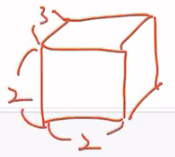

In [54]:
# 3차원 텐서에서 2차원 텐서로 변경
print(ft.view([-1, 3])) # 3차원 텐서를 2차원으로 변환하되 (?, 3) 크기로 변경
print(ft.view([-1, 3]).shape)

# 내부적으로 크기 변환 : (2 x 2 x 3) = (? x 3) = 12 이므로 ?=4

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])



- view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 함
- 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추함


In [55]:
# 3차원 텐서의 크기 변경
print(ft.view([-1, 1, 3])) # (2 x 2 x 3) = (? x 1 x 3) = 12 이므로 ?=4
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [59]:
# 스퀴즈(squeeze) - 1인 차원 제거
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)
print(ft.squeeze())
print(ft.squeeze().shape)

# 언스퀴즈(unsqueeze) - 특정 위치에 1인 차원 추가
ft = torch.Tensor([0, 1, 2])
print(ft.shape)
print(ft.unsqueeze(0)) # 0은 첫번째 차원을 의미
print(ft.unsqueeze(0).shape)

print(ft.view(1, -1)) # (1 x 3) = (1 x ?) = 3 이므로 ?=3
print(ft.view(1, -1).shape)

print(ft.unsqueeze(1)) # 두번째 차원에 1을 추가하겠다는 것. (3, ) -> (3, 1)
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])
torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [66]:
# 연결(concatenate)
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

print(x.shape, y.shape)
print(torch.cat([x, y], dim=0)) # dim이 0이면 첫번째 차원을 늘림
print(torch.cat([x, y], dim=0).shape) # (2, 2) -> (4, 2)
print(torch.cat([x, y], dim=1)) # dim이 1이면 두번째 차원을 늘림
print(torch.cat([x, y], dim=1).shape) # (2, 2) -> (2, 4)

# 스택킹(Stacking)
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))
# stack 의 내부 연산
# (2 x 2) -> 3개의 벡터는 (1 x 2) 가 됨. 이 벡터를 연결하면 (3 x 2) 가 됨
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0)) 

torch.Size([2, 2]) torch.Size([2, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([2, 4])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [68]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [70]:
# inplace 연산
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
